## 1.使用sklearn中的线性回归模型进行预测

In [1]:
import pandas as pd
import seaborn as sns #Seaborn是基于matplotlib的Python可视化库
sns.set(context="notebook", style="whitegrid", palette="dark")
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('ex1data1.txt', names=['population', 'profit'])#读取收集到的数据集

In [3]:
df.head()

population   profit
0      6.1101  17.5920
1      5.5277   9.1302
2      8.5186  13.6620
3      7.0032  11.8540
4      5.8598   6.8233

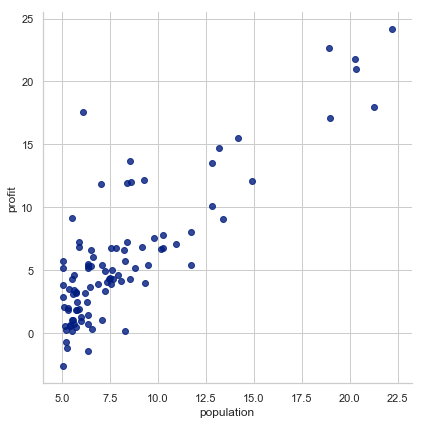

In [4]:
sns.lmplot('population','profit', df, height=6, fit_reg=False)
plt.show()

In [5]:
X = df.population#此时X是一维的
print(X.shape)
Y = df.profit
print(Y.shape)

(97,)
(97,)


(97, 1)
-3.89578087831185
[1.19303364]


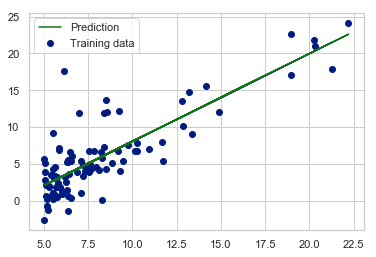

In [6]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression(fit_intercept=True)#fit_intercept : 默认为True,是否计算该模型的截距。
X_test = np.array([X]).reshape(-1,1)#此时X_test被转化为二维的，因为fit函数要求X是二维数组，如：a= [ [ 0] ]
print(X_test.shape)
# 训练模型
lr.fit(X_test,Y)
print(lr.intercept_)#截距
print(lr.coef_)#线性回归模型的系数，即斜率
y1 = lr.predict(X_test)

plt.scatter(X, Y, label="Training data")
plt.plot(X,y1,'g-',label="Prediction")
plt.legend(loc=2)
plt.show()

## 2.最小二乘法（正规方程法）

In [7]:
class LR_LS():
    def __init__(self):
        self.w = None      
    def fit(self, X, y):
        self.w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    def predict(self, X):
        y_pred = X.dot(self.w)
        return y_pred

if __name__ == "__main__":
    lr_ls = LR_LS()
    lr_ls.fit(X_test,Y)
    y2 = lr_ls.predict(X_test)

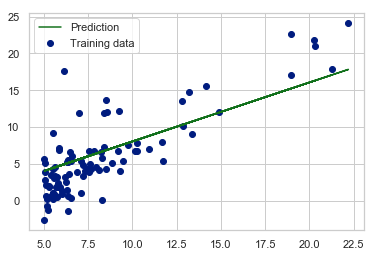

In [8]:
plt.scatter(X, Y, label="Training data")
plt.plot(X,y2,'g-',label="Prediction")
plt.legend(loc=2)
plt.show()

## 3.梯度下降法

In [9]:
class LR_GD():
    def __init__(self):
        self.w = None     
    def fit(self,X,Y,alpha=0.02,loss = 1e-10): # 设定步长为0.002,判断是否收敛的条件为1e-10
        Y = np.array([Y]).reshape(-1,1) #转化成二维
        [m,d] = np.shape(X) #自变量的维度
        self.w = np.zeros((d)) #将参数的初始值定为0
        tol = 1e5
        #============================= show me your code =======================
        while tol > loss:
            h_f = X.dot(self.w).reshape(-1,1) 
            theta = self.w + alpha*np.mean(X*(Y - h_f),axis=0) #计算迭代的参数值
            tol = np.sum(np.abs(theta - self.w))
            self.w = theta
        #============================= show me your code =======================
    def predict(self, X):
        # 用已经拟合的参数值预测新自变量
        y_pred = X.dot(self.w)
        return y_pred  

if __name__ == "__main__":
    lr_gd = LR_GD()
    lr_gd.fit(X_test,Y)
    y3 = lr_gd.predict(X_test)

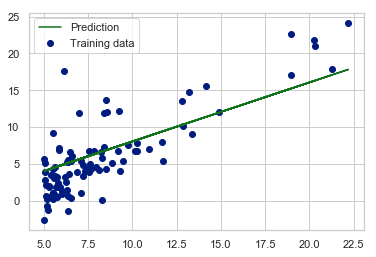

In [10]:
plt.scatter(X, Y, label="Training data")
plt.plot(X,y3,'g-',label="Prediction")
plt.legend(loc=2)
plt.show()